In [192]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sz.300677",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    
    start_date='2022-10-01', end_date='2023-10-30',
    frequency="d", 
    adjustflag="2")
# frequency：数据类型，默认为d，日k线；d=日k线、w=周、m=月、5=5分钟、15=15分钟、30=30分钟、60=60分钟k线数据，不区分大小写；
# 指数没有分钟线数据；周线每周最后一个交易日才可以获取，月线每月最后一个交易日才可以获取。

# adjustflag：复权类型，默认不复权：3；1：后复权；2：前复权。
# 后复权把历史分红送股给加进去了，数据贼大
# 前复权 不会把分红送股的涨跌加进去，也不会算成这一天的涨跌
# 不复权，及除权，会把分红算成是暴跌             # 个人觉得不用这个

print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
print(result)

#### 登出系统 ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code           open           high            low  \
0    2022-10-10  sz.300677  19.9500000000  20.3500000000  19.5100000000   
1    2022-10-11  sz.300677  19.6900000000  19.7800000000  19.0600000000   
2    2022-10-12  sz.300677  19.4700000000  19.9600000000  19.1100000000   
3    2022-10-13  sz.300677  20.0600000000  20.4200000000  19.9100000000   
4    2022-10-14  sz.300677  20.3500000000  22.1000000000  20.2600000000   
..          ...        ...            ...            ...            ...   
124  2023-04-11  sz.300677  26.5800000000  26.8500000000  26.3000000000   
125  2023-04-12  sz.300677  26.4700000000  26.7900000000  26.2900000000   
126  2023-04-13  sz.300677  26.4000000000  27.0600000000  26.0600000000   
127  2023-04-14  sz.300677  26.8800000000  27.2100000000  26.3400000000   


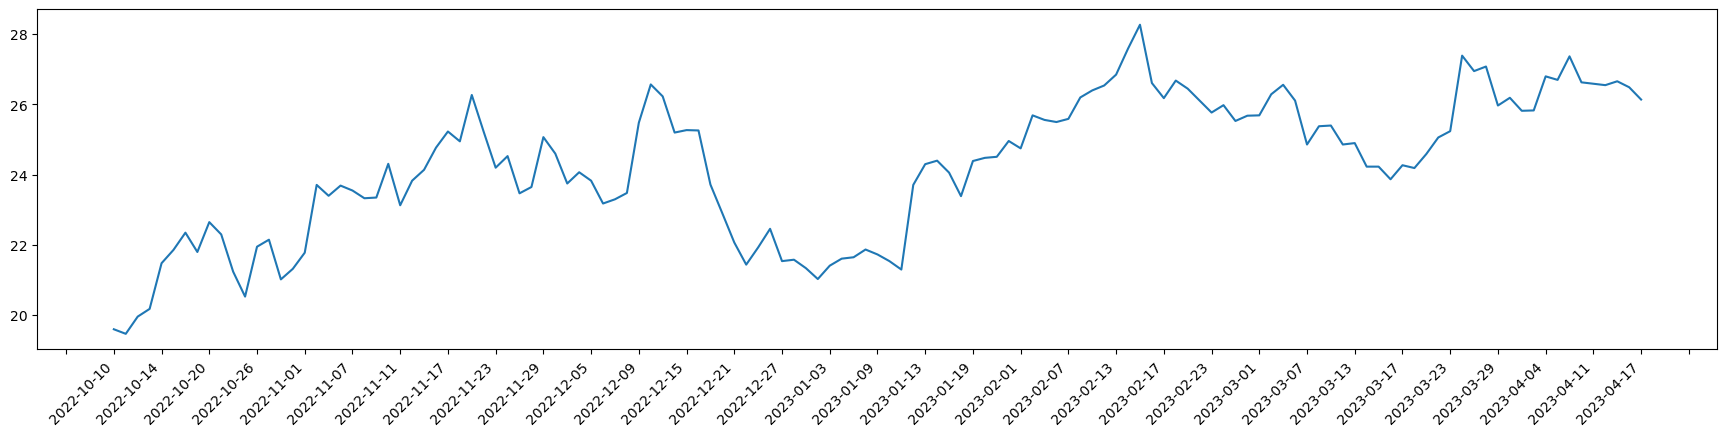

In [194]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

result['close'] = result['close'].astype(float)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
x = result.loc[:,'date']
y = result.loc[:,'close']

tick_spacing_x = 4

# tick_spacing_y = 1

ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_x))

# ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing_y))


fig.autofmt_xdate(rotation=45)
plt.subplots_adjust(left=0.06)

plt.plot(x,y)


In [186]:
import baostock as bs

# 登录系统
lg = bs.login()

# 获取股票基本信息
rs = bs.query_all_stock()
print('query_all_stock respond error_code:'+rs.error_code)
print('query_all_stock respond  error_msg:'+rs.error_msg)

# 打印结果集
data_list_stock = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并保存在列表变量中
    data_list_stock.append(rs.get_row_data())

result = pd.DataFrame(data_list_stock, columns=rs.fields)

# 登出系统
bs.logout()

login success!
query_all_stock respond error_code:0
query_all_stock respond  error_msg:success
logout success!


In [189]:
import csv
headers = ['code','num','name']
with open('/home/luotao/stock/data/A_stock.csv','w',newline='',encoding='utf-8') as fw0:
    writer = csv.DictWriter(fw0,fieldnames=headers)
    writer.writeheader()

with open('/home/luotao/stock/data/A_stock.csv','a',newline='',encoding='utf-8') as f0:
    for i in data_list_stock:
        adict = {}
        adict['code'] = i[0]
        adict['num']  = i[1]
        adict['name'] = i[2]
        writer = csv.DictWriter(f0,fieldnames=headers)
        writer.writerows([adict]) 


In [167]:
data_list_stock

[['bj.430047', '1', ''],
 ['bj.430090', '1', ''],
 ['bj.430139', '1', ''],
 ['bj.430198', '1', ''],
 ['bj.430300', '1', ''],
 ['bj.430418', '1', ''],
 ['bj.430425', '1', ''],
 ['bj.430476', '1', ''],
 ['bj.430478', '1', ''],
 ['bj.430489', '1', ''],
 ['bj.430510', '1', ''],
 ['bj.430556', '1', ''],
 ['bj.430564', '1', ''],
 ['bj.430685', '1', ''],
 ['bj.430718', '1', ''],
 ['bj.830799', '1', ''],
 ['bj.830809', '1', ''],
 ['bj.830832', '1', ''],
 ['bj.830839', '1', ''],
 ['bj.830879', '1', ''],
 ['bj.830946', '1', ''],
 ['bj.830964', '1', ''],
 ['bj.830974', '1', ''],
 ['bj.831010', '1', ''],
 ['bj.831039', '1', ''],
 ['bj.831087', '1', ''],
 ['bj.831152', '1', ''],
 ['bj.831167', '1', ''],
 ['bj.831195', '1', ''],
 ['bj.831278', '1', ''],
 ['bj.831305', '1', ''],
 ['bj.831370', '1', ''],
 ['bj.831445', '1', ''],
 ['bj.831526', '1', ''],
 ['bj.831641', '1', ''],
 ['bj.831689', '1', ''],
 ['bj.831726', '1', ''],
 ['bj.831768', '1', ''],
 ['bj.831832', '1', ''],
 ['bj.831834', '1', ''],


In [173]:
# 下载所有股票信息
outpath= '/home/luotao/stock/data/stock/'

lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
for stock in data_list_stock:
    code = stock[0]
    if 'sh.6' in code or 'sz.0' in code or 'sz.30' in code:
        rs = bs.query_history_k_data_plus(code,
            "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
            start_date='2000-01-01',
            frequency="d", 
            adjustflag="2")
        
        # frequency：数据类型，默认为d，日k线；d=日k线、w=周、m=月、5=5分钟、15=15分钟、30=30分钟、60=60分钟k线数据，不区分大小写；
        # 指数没有分钟线数据；周线每周最后一个交易日才可以获取，月线每月最后一个交易日才可以获取。

        # adjustflag：复权类型，默认不复权：3；1：后复权；2：前复权。
        # 后复权把历史分红送股给加进去了，数据贼大
        # 前复权 不会把分红送股的涨跌加进去，也不会算成这一天的涨跌
        # 不复权，及除权，会把分红算成是暴跌             # 个人觉得不用这个
        
        
        
        if rs.error_code != '0':
            print('query_history_k_data_plus respond error_code:'+rs.error_code)
            print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
        
        #### 打印结果集 ####
        data_list = []
        while (rs.error_code == '0') & rs.next():
            # 获取一条记录，将记录合并在一起
            data_list.append(rs.get_row_data())
        result = pd.DataFrame(data_list, columns=rs.fields)

        #### 结果集输出到csv文件 ####   
        result.to_csv(outpath + stock[0] + '_' + stock[2] + '.csv', index=False)
#### 登出系统 ####
bs.logout()


login success!
login respond error_code:0
login respond  error_msg:success
logout success!


In [60]:
x = []
y = []
txt = []
for i in new_list:
    with open(inpath+i) as f:
        line_count = 0
        GC_rate = 0
        seq_len = 0
        for line in f:
            if '#' in line or '//'== line[:2] or '\n' == line:
                pass
            else:
                seq = line.split()[1]
                seq = ''.join(re.findall('\w',seq)).upper()
                GC_count = seq.count('G')+seq.count('C')
                line_count += 1
                GC_rate += GC_count/len(seq)
                seq_len += len(seq)
        print(i+':',GC_rate/line_count)
        x.append(GC_rate/line_count)
        y.append(seq_len/line_count)
        txt.append(i[:-9])
                

group-II-D1D4-1.cons.sto: 0.5545066050379898
ydao.cons.sto: 0.5911356119214013
nhaa-1.cons.sto: 0.6666666666666666
glmS.cons.sto: 0.5571567691205312
Twister-sister.cons.sto: 0.6941062801932367
yybp.cons.sto: 0.5775295395575172
lys.cons.sto: 0.4031425066950425
gly.cons.sto: 0.5736081498015553
tpp.cons.sto: 0.5545863910739913
c_di_gmp2_gcg.cons.sto: 0.5959652890717375
adocbl_v.cons.sto: 0.47074340950477667
glms.cons.sto: 0.5571567691205312
moco.cons.sto: 0.4863906103954813
sam_14v.cons.sto: 0.5919949627971043
RAGATH-18.cons.sto: 0.4335608352435902
c_di_gmp_1.cons.sto: 0.5409986010624311
Hammerhead_3.cons.sto: 0.5139715123586092
Twister-P5.cons.sto: 0.7282110713360713
Pistol.cons.sto: 0.40260135602601355
Hammerhead_II.cons.sto: 0.632349190084194
2_dg2_pur.cons.sto: 0.4225035070301836
gly_gganga.cons.sto: 0.5543898303175613
thf.cons.sto: 0.4464733618038402
c_di_gmp_gag.cons.sto: 0.556504752235351
guanidine2.cons.sto: 0.7602836879432624
c_di_gmp1_uau.cons.sto: 0.5494309176736428
twister-P3.

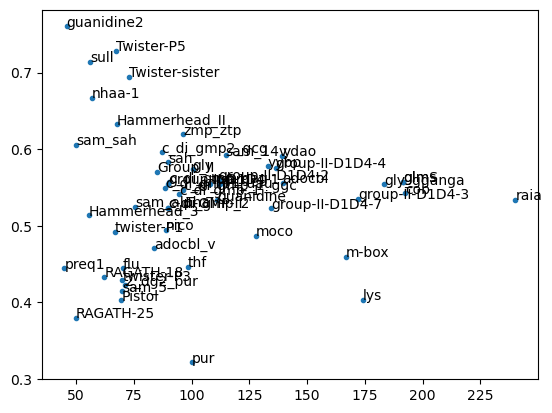

In [61]:
import matplotlib.pyplot as plt
plt.scatter(y,x,marker='.')

for i in range(len(x)):
    plt.annotate(txt[i], xy = (y[i], x[i]), xytext = (y[i], x[i])) # 这里xy是需要标记的坐标，xytext是对应的标签坐标
plt.show()

In [30]:
df = pd.read_excel(inpath+'Submitte_16.xlsx' )

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [214]:
def test(*args,**kwargs):
    print(args)
    print('args_len:',type(args))
    print(kwargs)


In [217]:
l = [12,3,'2']
t = ('c','d')
test(l,c=t)

([12, 3, '2'],)
args_len: <class 'tuple'>
{'c': ('c', 'd')}


In [216]:
test(1,2,3)

(1, 2, 3)
args_len: <class 'tuple'>
{}
